# Customer Churn Analysis

In [1]:
# Importing important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

## Description of dataset

### Customer Churn Analysis
#### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

## Loading Database

In [2]:
url = 'https://raw.githubusercontent.com/Bhushan0130/Datasets/main/Telecom_customer_churn.csv'
df = pd.read_csv(url)
df.shape
# (7043, 21)

(7043, 21)

In [3]:
pd.set_option('display.max_rows', None)  # to maximize the rows
pd.set_option('display.max_columns', None)  # to maximize the columns

In [4]:
df.head()  # top 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.sample(5)  # random one row

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1865,7064-FRRSW,Male,1,No,No,48,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Electronic check,99.00,4744.35,No
3220,8205-VSLRB,Male,0,Yes,No,70,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),77.30,5498.2,No
2984,6765-MBQNU,Female,0,Yes,No,26,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,26.00,684.05,No
2716,7883-ROJOC,Female,0,Yes,No,19,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,44.90,839.65,No
4752,1682-VCOIO,Male,0,No,No,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.45,481.1,No


In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## Information about dataset

In [7]:
df.info()

# dataset is haviing 7043 rows and 21 columns
# 18 columns are of object type and 3 are of int type
# As non_null values are same for each column, means null values are not present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.dtypes

# # #   Column            Non-Null Count  Dtype  
# ---  ------            --------------  -----  
#  0   customerID        7043 non-null   object 
#  1   gender            7043 non-null   object 
#  2   SeniorCitizen     7043 non-null   int64  
#  3   Partner           7043 non-null   object 
#  4   Dependents        7043 non-null   object 
#  5   tenure            7043 non-null   int64  
#  6   PhoneService      7043 non-null   object 
#  7   MultipleLines     7043 non-null   object 
#  8   InternetService   7043 non-null   object 
#  9   OnlineSecurity    7043 non-null   object 
#  10  OnlineBackup      7043 non-null   object 
#  11  DeviceProtection  7043 non-null   object 
#  12  TechSupport       7043 non-null   object 
#  13  StreamingTV       7043 non-null   object 
#  14  StreamingMovies   7043 non-null   object 
#  15  Contract          7043 non-null   object 
#  16  PaperlessBilling  7043 non-null   object 
#  17  PaymentMethod     7043 non-null   object 
#  18  MonthlyCharges    7043 non-null   float64
#  19  TotalCharges      7043 non-null   object 
#  20  Churn             7043 non-null   object 

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df['TotalCharges'].dtypes
# As we can see 'TotalCharges' column is of object type but having integer value
# there we should convert this column into interger type

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')  
# Coverting object column into numeric type

In [18]:
df['TotalCharges'].dtypes  # TotalCharges column have been converted into float64 type

# dtype('float64')

dtype('float64')

## Null value checking 

In [20]:
df.isnull().sum()

# null values are present TotalCharges column
# TotalCharges        11

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
df.isnull().sum().sum()  
# Total 11 null values, we are having, 
# this count is so small for our dataset, 
# we can remove this rows and it will not impact much to our training dataset

# 11

11

<AxesSubplot:>

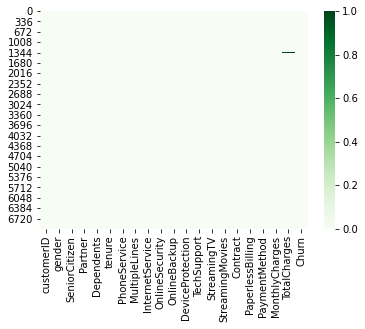

In [23]:
sns.heatmap(df.isnull(), cmap = 'Greens')

In [24]:
# HeatMap is not clear, Few null values are present in the dataset

In [36]:
df.shape
# (7043, 21)

(7043, 21)

In [37]:
df.dropna(inplace = True)  # Remvoing null values

In [38]:
df.shape  # Not major difference found after remove null values
# (7032, 21)

(7032, 21)

In [39]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


## Data Preprocessing

#### Deleting columns which are not necessary for Training the model

In [40]:
# customerID column: is not needed for building ML model, because it is just a unique number for each customer
# therefore better to remove it from the dataset

In [41]:
# Found these columns as un usuable for building Ml model
df.drop(columns = ['customerID'], inplace = True)

In [42]:
df.shape
# (7032, 20)

(7032, 20)

In [50]:
# Tenure column can be converted into some class range 
print('Minimum value of tenure column: ', df['tenure'].min())
print('Maxium value of tenure column: ', df['tenure'].max())

# Minimum value of tenure column:  1
# Maxium value of tenure column:  72

Minimum value of tenure column:  1
Maxium value of tenure column:  72


In [56]:
df['tenure'].unique() # Unique value of tenure column

# array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
#        21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
#         9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
#        36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
#        54, 51, 26, 39], dtype=int64)

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

In [58]:
# Loop for creating class of tenure class
tenure_class = []
for i in df['tenure']:
    if i in range (0, 16):
        tenure_class.append('0-15 yrs')
    elif i in range (16, 31):
        tenure_class.append('16-30 yrs')
    elif i in range(31,46):
        tenure_class.append('31-45 yrs')
    elif i in range(46, 61):
        tenure_class.append('46-60 yrs')
    elif i in range(61, 75):
        tenure_class.append('60+ yrs')
len(tenure_class)

# 7032

7032

In [60]:
df['Tenure'] = tenure_class  # Created new column for tenure column

In [68]:
# As we converted tenure column into Tenure column, therefore now we can remove tenure coloum from dataset
df.drop(columns = ['tenure'], inplace = True)

In [70]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-15 yrs
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,31-45 yrs


In [71]:
df.shape

(7032, 20)

In [73]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
Tenure               object
dtype: object

##### Countplot for object type columns

In [74]:
object_col = df.select_dtypes(include = 'object').keys()
object_col

# Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
#        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
#        'PaperlessBilling', 'PaymentMethod', 'Churn', 'Tenure'],
#       dtype='object')

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'Tenure'],
      dtype='object')

In [77]:
for i in object_col:
    print(i, 'column')
    print(df[i].value_counts(), '\n')

gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

OnlineSecurity column
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

OnlineBackup column
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 

DeviceProtection column
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64 

TechSupport column
No 

In [78]:
# numeric Columns
numeric_col = df.select_dtypes(include = ['int64', 'float64']).keys()
numeric_col

# Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges'], dtype='object')

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges'], dtype='object')

## Visualization

### For Categorical columns

In [79]:
object_col
# Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
#        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
#        'PaperlessBilling', 'PaymentMethod', 'Churn', 'Tenure'],
#       dtype='object')

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'Tenure'],
      dtype='object')

In [80]:
df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

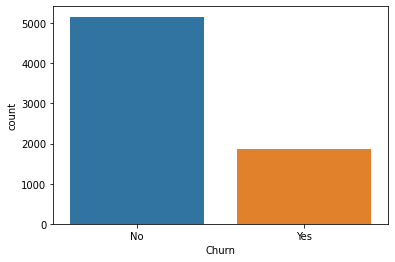

In [81]:
sns.countplot(df.Churn)

In [82]:
# As we can see our target variable value_count is not same for both class, need to balance this my applying SMOTE technique

In [92]:
object_col = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'Tenure', 'SeniorCitizen' ]

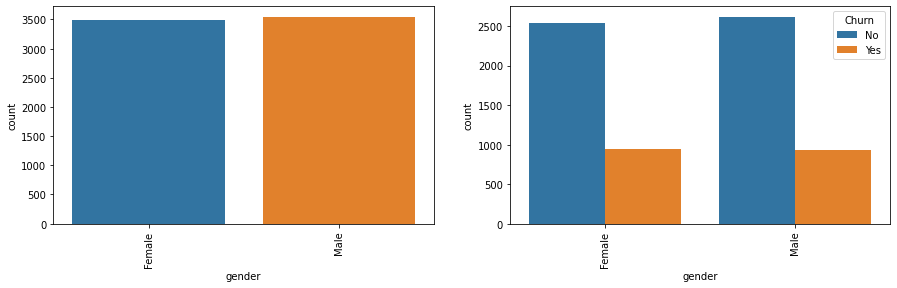

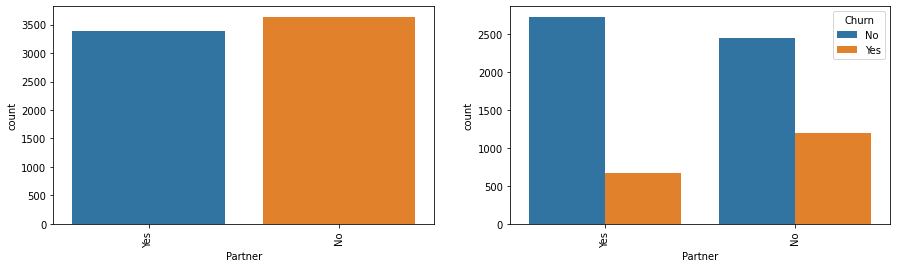

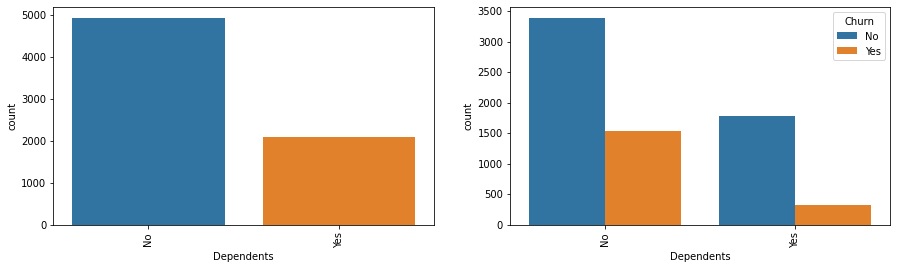

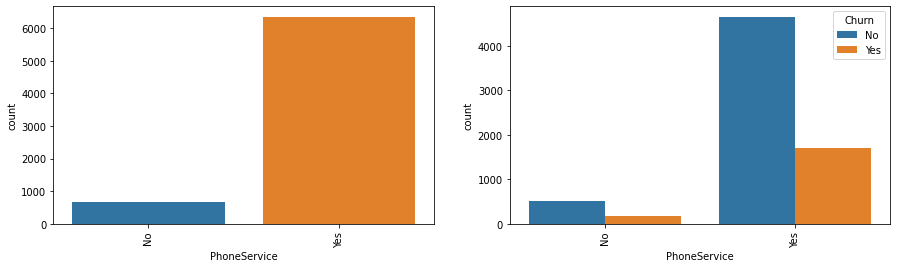

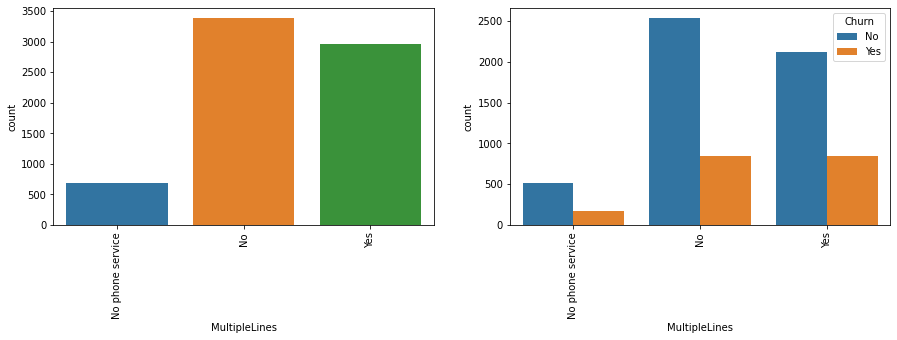

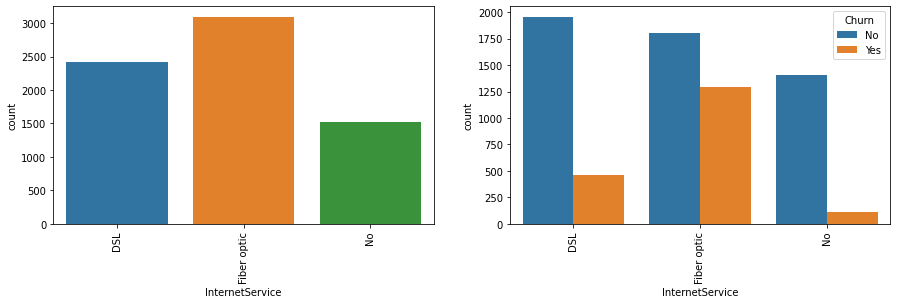

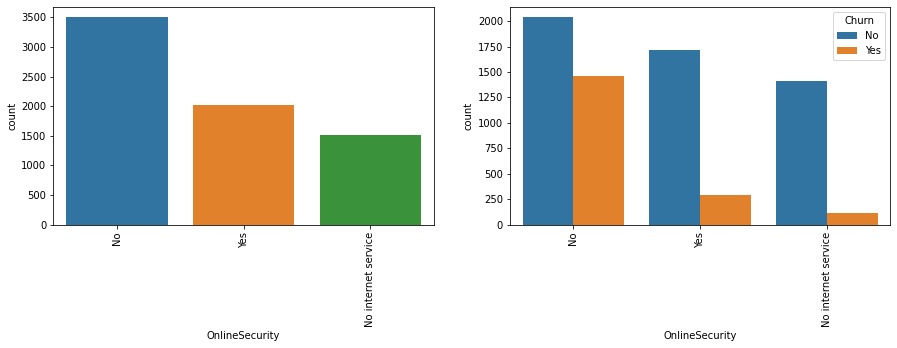

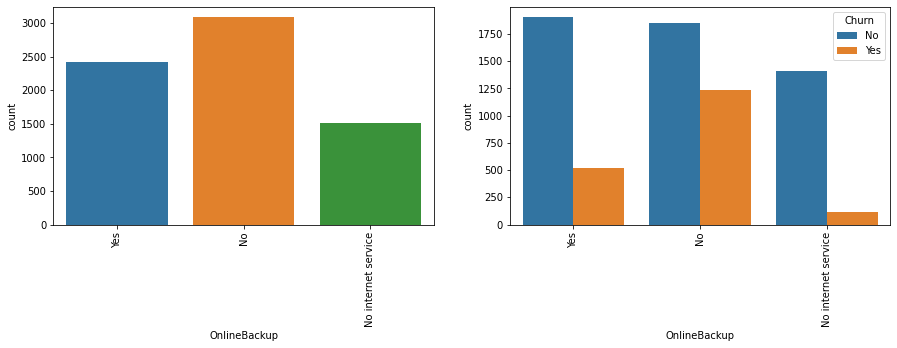

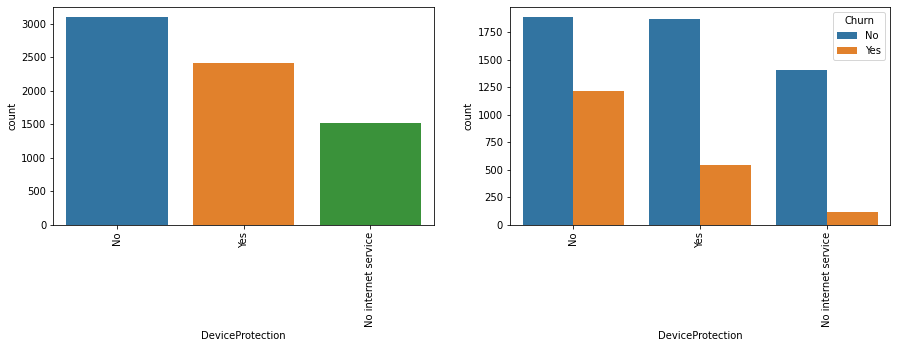

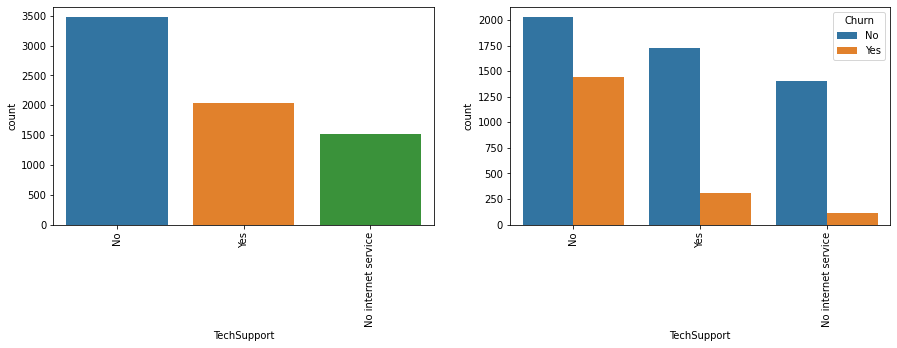

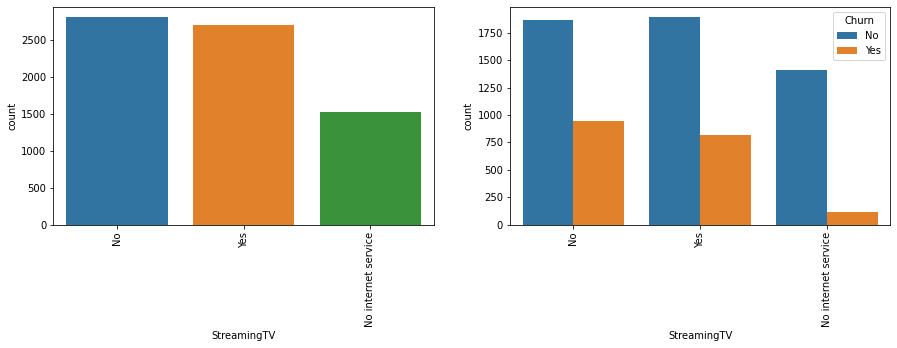

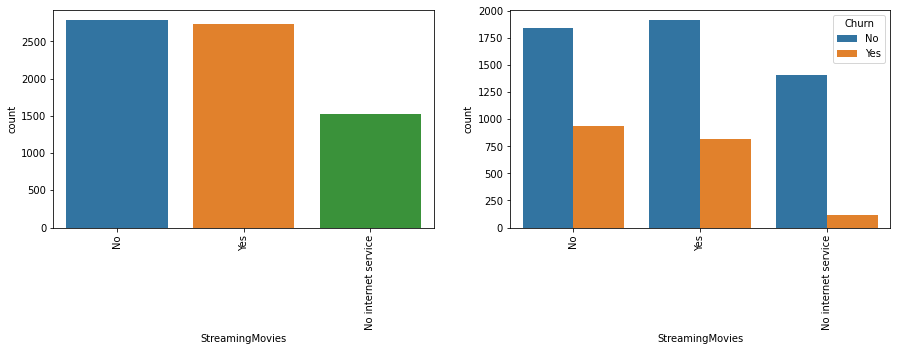

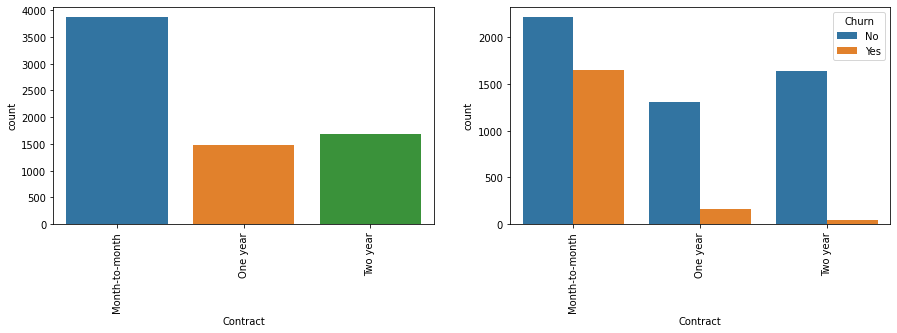

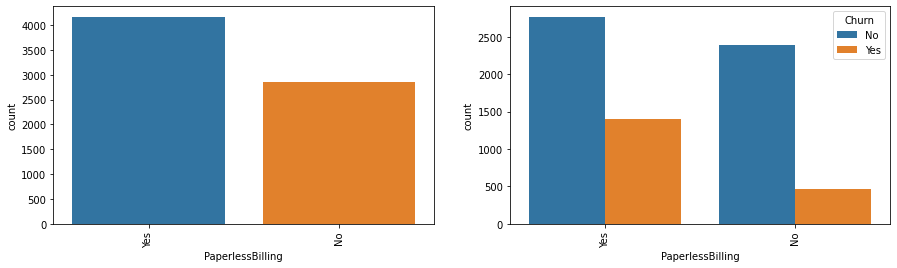

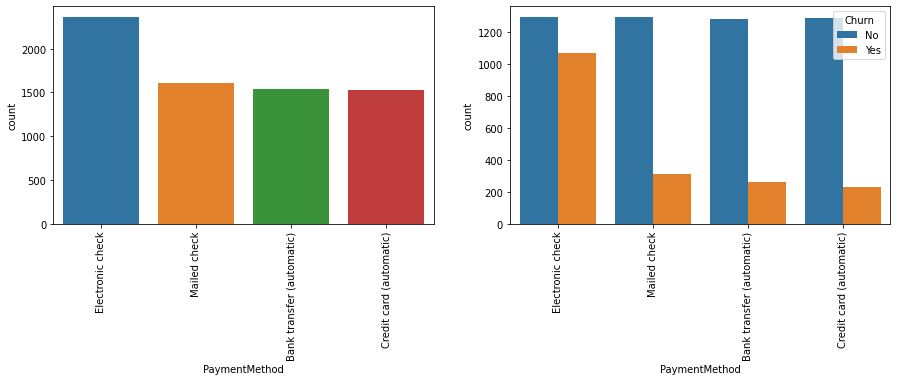

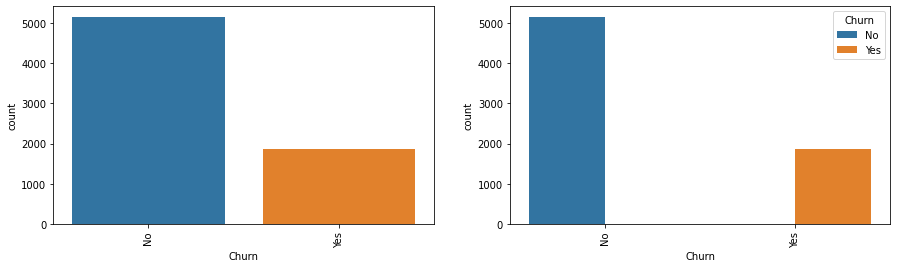

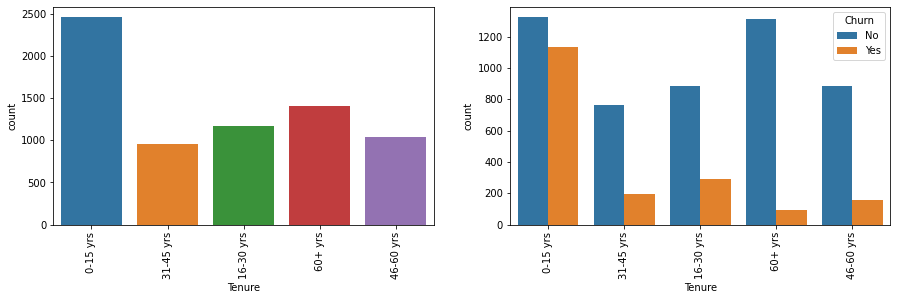

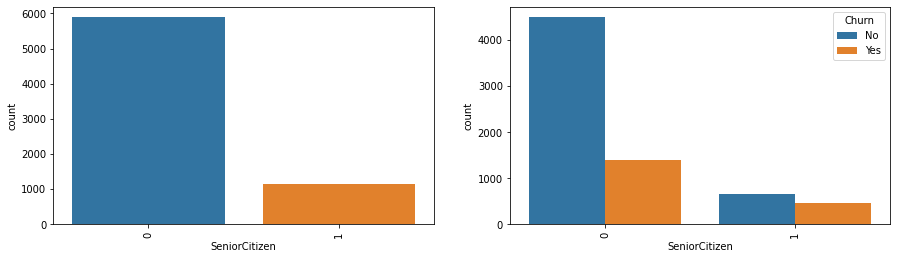

In [93]:
# countplot for object type columns
for i in object_col:    
    plt.figure(figsize= (15, 4))
    l = list(df[i].unique())
    plt.subplot(1,2, 1)
    bar = sns.countplot(df[i])
    bar.set_xticklabels(labels = l, rotation = 90)

    plt.subplot(1,2, 2)
    bar1 = sns.countplot(df[i], hue = df['Churn'])
    bar1.set_xticklabels(labels = l, rotation = 90)

    plt.show()

In [ ]:
# Gender:
# for both gender, value seems almost same, therefore we can say, gender not impacting much to churn

# OnlineBackup:
# Due online Backup issue many customer have churn 

# Device protection 
# may be due to mobile protection, people churn the telecome, therefore company needs to work on it

# Patner column:
# We can say if person is not having partner, then he is churn 

# Dependent column
# majority for population do not churn if he is not having dependents

# Phone service
# Majority of population who churn, basically having phone services, need to improve phone service

# MultipleLines column
# Very less people churn if person is not having phone service

# Internet Service
# Telcom compnay need to work highly on fiber optice, by seeing it we can say, due fiber optice problem many person have churn

# Online Security
# Majority of customer have churn due to internet security factor

# TechSupport
# As we can see many of custerm have churn due to No tech support, need to work on it.

# Streaming TV and Streamiing Movies: 
# this is also leading for churn 

# Contract column:
# Majority of customer have churn, who are having month to month contract, need to find what problem they facing ,
# and how can be fixed that
# Paper Less billing is also leading for churn 
# ElectronicMethod is main reason out of remaining,  for churn the telecom
# Churn column, data is not balanced, need to balance it

# Tenure column:
# customer having age more than 60 they are more loyal to the company as its churn rate is least as compare to other 
# age group class 

# SeniorCitizen:
# When seniorCitizen is 0 then its churn rate less as compare to 1

In [ ]:
obj = object_col.append()

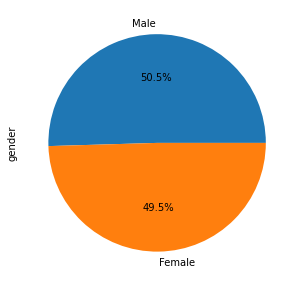

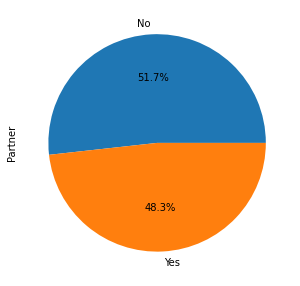

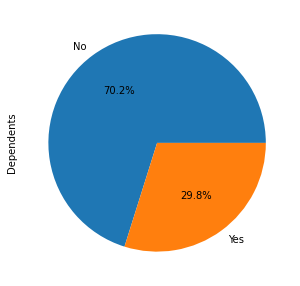

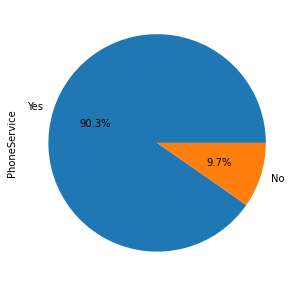

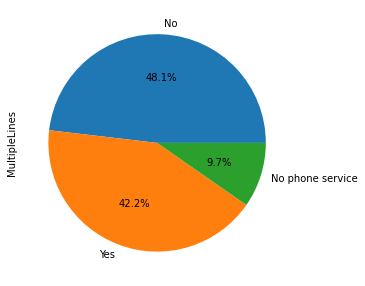

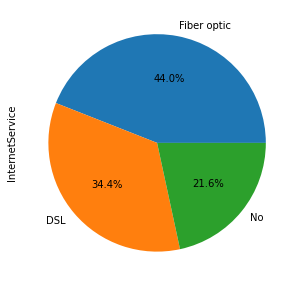

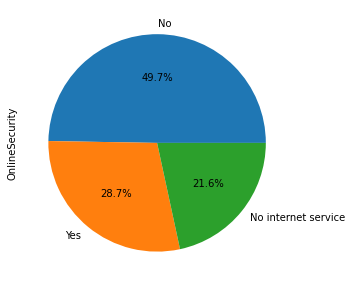

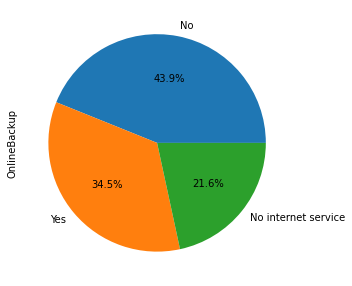

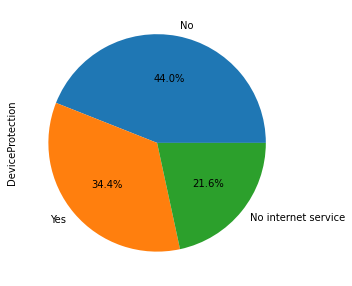

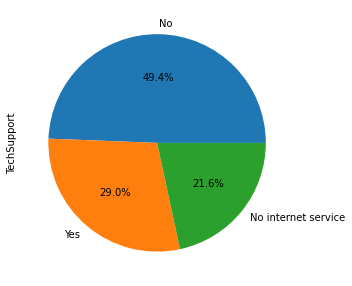

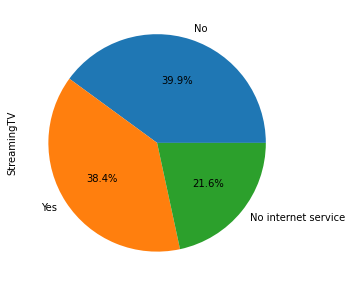

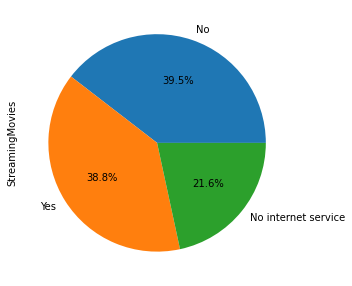

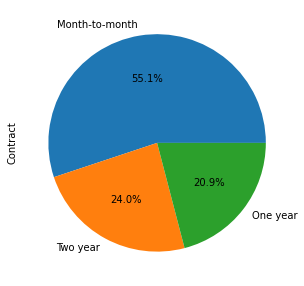

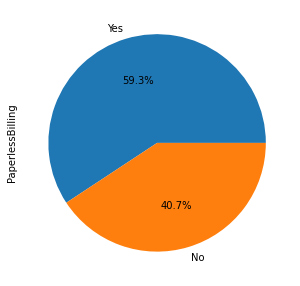

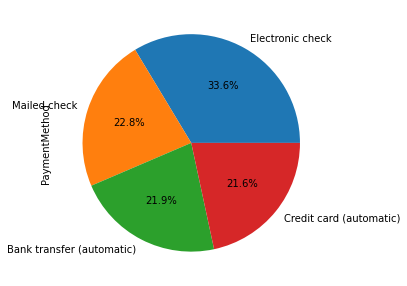

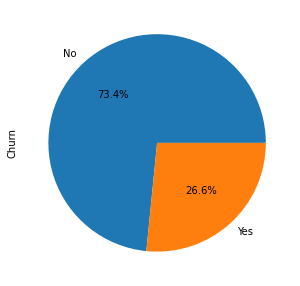

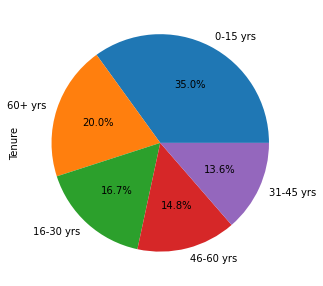

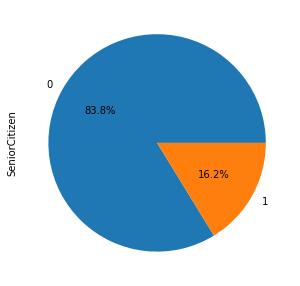

In [94]:
# We can see percentage of value counts object type columns 
for i in object_col:
    plt.figure(figsize = (5, 5))
    df[i].value_counts().plot(kind = 'pie', autopct = '%.1f%%')


In [88]:
# we can see for gender , partner columns we are getting much difference in their class or value
# means and gender and partner is not impacting much, 

# Dependents columns: 
# No: 7.2%
# Yes: 29.8%  

# PhoneService
# Yes: 90.3%
# No: 9.7%
 # As it value count is not near, these column will impact more to the target variable
    
# MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, Techsupport, Streaming TV, StreamingMovies
# Contract, PaperLessBilling, Paymentmethod, tenure columns are not having near value counts
# They will impect more to the target variable  as compare to those columns which are value almost same value count

# 83.8% customer having seniorcitizen as 0 and rest having 1

In [96]:
numeric_col = ['MonthlyCharges', 'TotalCharges']

### Checking Ouliers

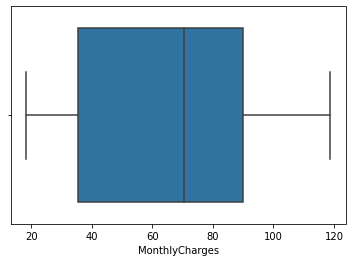

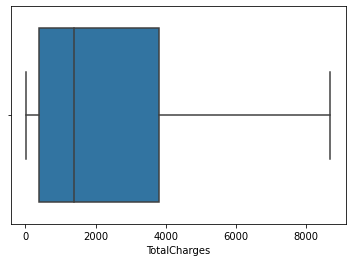

In [97]:
for i in numeric_col:
    plt.figure()
    sns.boxplot(df[i])  # Checking outlier for numeric columns

In [ ]:
# MonthlyCharges and Total Charges columns not having any outliers,
# It seems good that no outlier present

### Check skewness of the columns

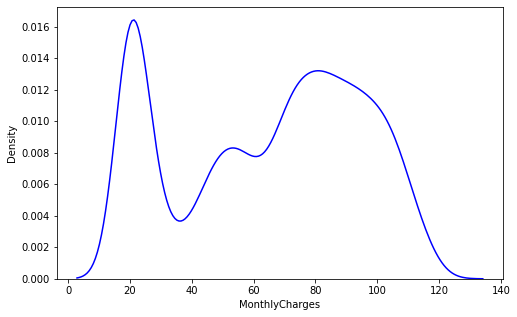

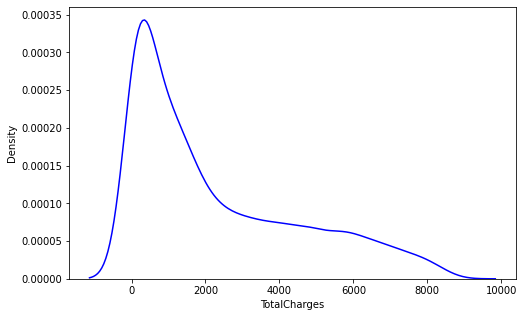

In [99]:
for i in numeric_col:
    plt.figure(figsize = (8,5))
    sns.distplot(df[i], color = 'b', hist = False)   # checking skewness of numeric columns

In [ ]:
# Both columns are showing skewness, need to check its skewness value and need to apply operations accordingly
# TotalCharges is right skewed
# MonthlyCharges is left skewed

### Distribution of Columns

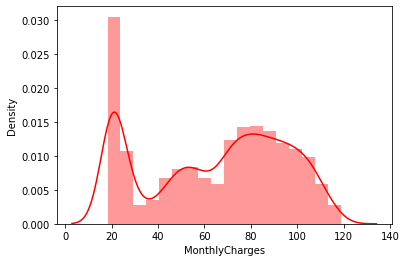

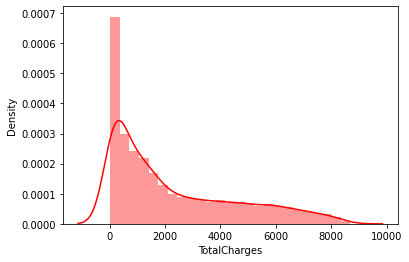

In [100]:
for i in numeric_col:
    plt.figure()
    sns.distplot(df[i], kde = True, color = 'r')  # Checking distribution of numeric columns

In [101]:
# MonthlyCharges columnm having minimum value at 20 and maxium value at 120 approx
# and TotalCharges column having minimum value at 0 and maxium value at near 8000
# Need to perform skewness remvoing techniques to change these columns into normally distributed columns

### Spread of Columns

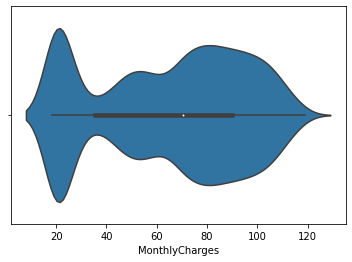

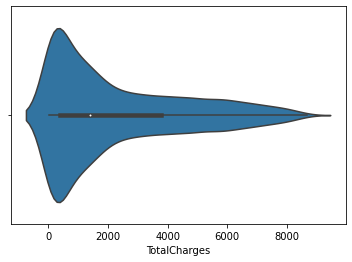

In [102]:
for i in numeric_col:    
    plt.figure()
    sns.violinplot(df[i], orient = 'vertical')  # Checking spread of numeric columns

In [103]:
# Both column are well spread at their value are lying in some range 

### Knowing the pattern of data

<AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>

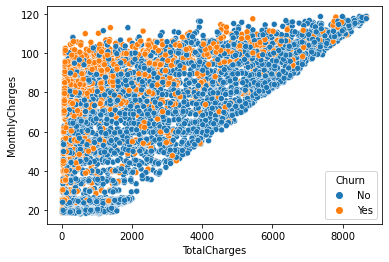

In [108]:
plt.figure()
sns.scatterplot(df['TotalCharges'], df['MonthlyCharges'], hue = df['Churn'])

In [109]:
# Monthly charges are increasing as totalcharges are increasing

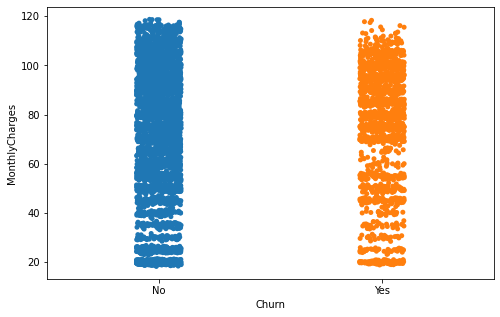

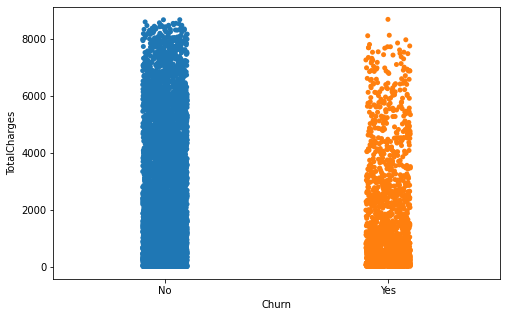

In [113]:
for i in numeric_col:                                       
    plt.figure(figsize = (8, 5))
    ax = sns.stripplot(df['Churn'], df[i])
    ax.set(xlabel = 'Churn', ylabel = i)

In [ ]:
# MonthlyCharges with Churn:
# When monthly charges increase then customer churn take place in high rate

# TotalCharges
# we can see churn is decreasing when TotalCharges is decreasing

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

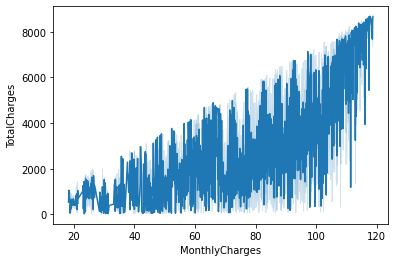

In [115]:
plt.figure()
sns.lineplot(x='MonthlyCharges', y='TotalCharges', data=df)

In [ ]:
# totalcharges increases with monthlycharges

In [117]:
print(object_col)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'Tenure', 'SeniorCitizen']


<AxesSubplot:xlabel='Churn', ylabel='Tenure'>

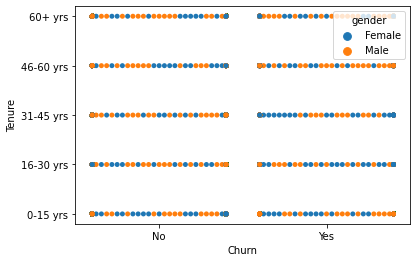

In [123]:
plt.figure()
sns.swarmplot(df['Churn'], df['Tenure'], hue = df['gender'])

### Correlation of the columns

In [124]:
df.corr()

,SeniorCitizen,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.219874,0.102411
MonthlyCharges,0.219874,1.000000,0.651065
TotalCharges,0.102411,0.651065,1.000000


<AxesSubplot:>

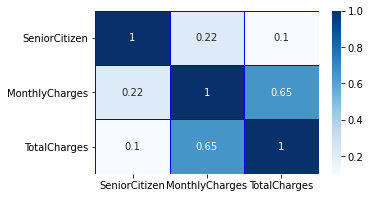

In [127]:
plt.figure(figsize = (5, 3))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', linewidth = 0.5, linecolor = 'blue' )   # Heatmap with number, 

In [128]:
# MonthlyCharges and TotalCharges columns are correlation 

### Describe Data

In [129]:
df.describe()

,SeniorCitizen,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,0.162400,64.798208,2283.300441
std,0.368844,30.085974,2266.771362
min,0.000000,18.250000,18.800000
25%,0.000000,35.587500,401.450000
50%,0.000000,70.350000,1397.475000
75%,0.000000,89.862500,3794.737500
max,1.000000,118.750000,8684.800000


<AxesSubplot:>

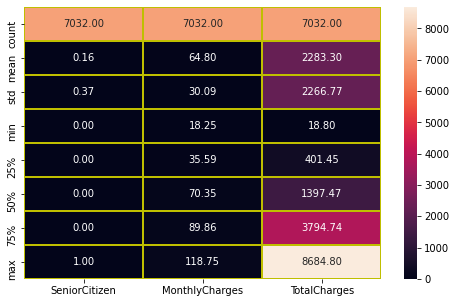

In [131]:
plt.figure(figsize = (8, 5))
sns.heatmap(df.describe(), annot = True, linewidth = 0.05, linecolor = 'y', fmt = "0.2f")

In [132]:
# As we can see in MonthlyCharges columns we are getting some difference between mean and 50% percentile
# TotalColumn is also showing difference between mean and 50 percentile 

## Encoding

In [133]:
df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [157]:
for i in object_col:
    print(i,'column having ',df[i].nunique(),'values')

# gender column having  2 values
# Partner column having  2 values
# Dependents column having  2 values
# PhoneService column having  2 values
# MultipleLines column having  3 values
# InternetService column having  3 values
# OnlineSecurity column having  3 values
# OnlineBackup column having  3 values
# DeviceProtection column having  3 values
# TechSupport column having  3 values
# StreamingTV column having  3 values
# StreamingMovies column having  3 values
# Contract column having  3 values
# PaperlessBilling column having  2 values
# PaymentMethod column having  4 values
# Churn column having  2 values
# Tenure column having  5 values
# SeniorCitizen column having  2 values

gender column having  2 values
Partner column having  2 values
Dependents column having  2 values
PhoneService column having  2 values
MultipleLines column having  3 values
InternetService column having  3 values
OnlineSecurity column having  3 values
OnlineBackup column having  3 values
DeviceProtection column having  3 values
TechSupport column having  3 values
StreamingTV column having  3 values
StreamingMovies column having  3 values
Contract column having  3 values
PaperlessBilling column having  2 values
PaymentMethod column having  4 values
Churn column having  2 values
Tenure column having  5 values
SeniorCitizen column having  2 values


#### Applying LabelEncoder to the Target Variable (fraud_reported)

In [136]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_df = df.copy()

In [137]:
encoded_df['Churn'] = le.fit_transform(encoded_df['Churn'])  
# Applying encoding to the target variable

In [140]:
encoded_df.Churn.unique() 
# array([0, 1])
# No: 0
# Yes: 1

array([0, 1])

In [158]:
# print(object_col)
encode_list = ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                'Contract', 'PaperlessBilling', 'PaymentMethod', 'Tenure', ]
# encode_list

#### Applying OneHotEncoding to  categorical features

In [155]:
encoded_df = pd.get_dummies(encoded_df, columns =  encode_list)
# Applied OneHotEncoding to the Object type variable

In [156]:
encoded_df.shape

(7032, 51)

#### Checking impect of variables to the target variable

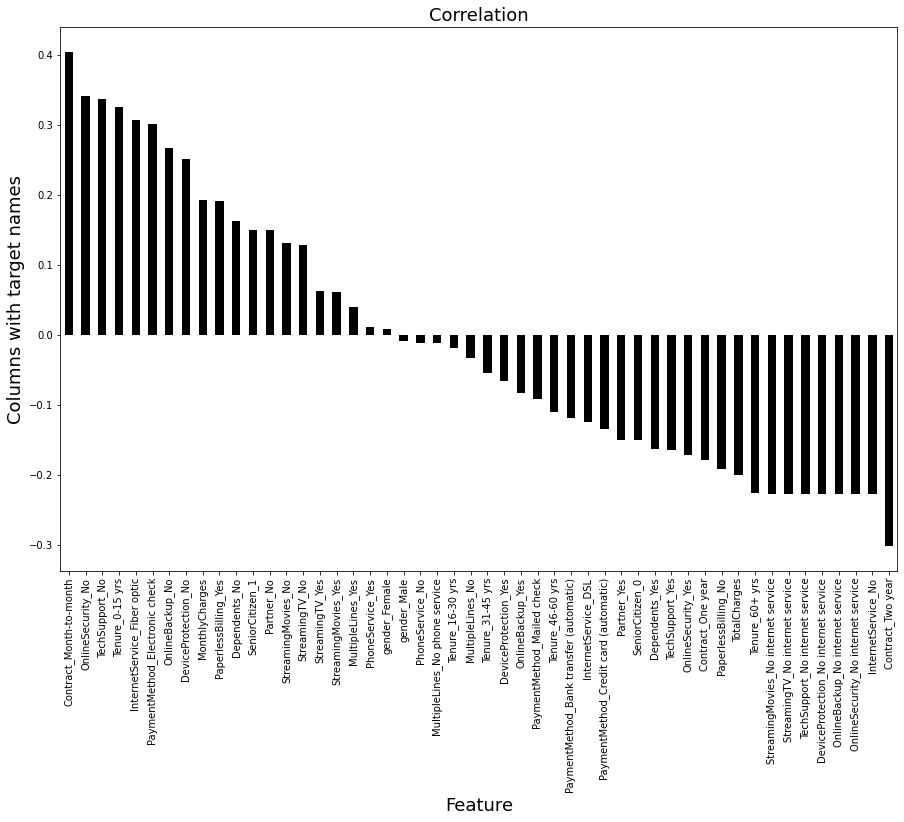

In [159]:
plt.figure(figsize = (15, 10))
encoded_df.corr()['Churn'].sort_values(ascending = False).drop(['Churn']).plot(kind = 'bar', color = 'black')
plt.xlabel( 'Feature', fontsize = 18)
plt.ylabel( 'Columns with target names', fontsize = 18)
plt.title ('Correlation', fontsize = 18)
plt.show()

In [ ]:
# Contract_month_to_month, Online_security_No and TechSupport_No is showing high positive impact on Churn (Target variable)
# wherease, contract_twoyear, InternetService_No, OnlineSecurity_No internet_service is showing high negative impact on churn

### Remove Outliers

##### using zscore technique

In [627]:
from scipy.stats import zscore

In [160]:
# No need to apply outlier removing technique as numeric column having no outliers

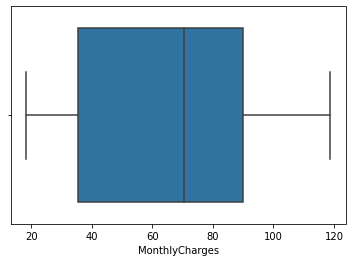

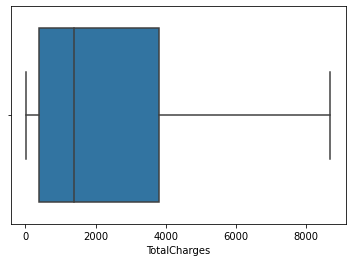

In [162]:
for i in numeric_col:
    plt.figure()
    sns.boxplot(encoded_df[i])  # Checking outlier for numeric columns

### Seperating Data into x and y form

In [163]:
x = encoded_df.drop(columns = ['Churn'])
y = encoded_df['Churn']

print(x.shape)
print(y.shape)

# (7032, 50)
# (7032,)

(7032, 50)
(7032,)


In [164]:
y.unique()

# array([0, 1])

array([0, 1])

### Apply SMOTE Technique Balance the data

In [165]:
y.value_counts()

# 0    5163
# 1    1869

0    5163
1    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

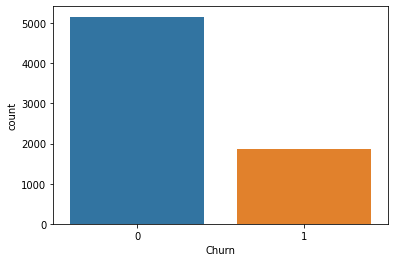

In [166]:
sns.countplot(y)

In [167]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [168]:
x, y = smote.fit_resample(x,y)

In [169]:
y.value_counts()

# 0    5163
# 1    5163

0    5163
1    5163
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

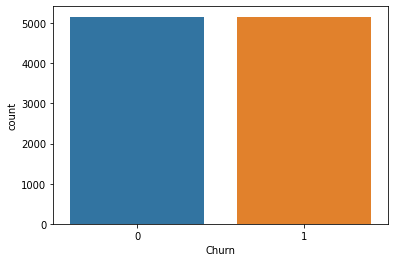

In [170]:
sns.countplot(y)

In [171]:
# We apply up sample because if we apply down sampling , then it may leads to remove important record and will impact on 
# model performace

In [174]:
x.head(2)

,MonthlyCharges,TotalCharges,SeniorCitizen_0,SeniorCitizen_1,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_0-15 yrs,Tenure_16-30 yrs,Tenure_31-45 yrs,Tenure_46-60 yrs,Tenure_60+ yrs
0,29.85,29.85,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
1,56.95,1889.50,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0


In [178]:
numeric_col = ['MonthlyCharges', 'TotalCharges' ]
x.shape

(10326, 50)

### Remove Skewness

In [179]:
numeric_col

# ['MonthlyCharges', 'TotalCharges']

['MonthlyCharges', 'TotalCharges']

In [180]:
x[numeric_col].skew()

# MonthlyCharges   -0.422146
# TotalCharges      1.095919

MonthlyCharges   -0.422146
TotalCharges      1.095919
dtype: float64

In [181]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [182]:
x[numeric_col] = pt.fit_transform(x[numeric_col])
# applying skewness removing techniques to skewed columns of dataset

In [183]:
x[numeric_col].skew()

# MonthlyCharges   -0.308320
# TotalCharges     -0.126454

MonthlyCharges   -0.308320
TotalCharges     -0.126454
dtype: float64

In [184]:
# Both numeric columns is showing skewness value which is in acceptable range, Now, we can move ahead

### Multicoliearity

##### Using VIF Technique

In [185]:
# using VIF Technique
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [186]:
# function to calculate VIF
def cal_vif(data):   
    vif = pd.DataFrame()
    vif['Columns Name'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return (vif)

In [187]:
cal_vif(x[numeric_col])

# Columns Name	VIF
# 0	MonthlyCharges	1.516051
# 1	TotalCharges	1.516051

# Both columns vif value is in acceptable range

,Columns Name,VIF
0,MonthlyCharges,1.516051
1,TotalCharges,1.516051


## Scaling

In [189]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()   # Instance of Standard Scaler

In [190]:
x[numeric_col] = ss.fit_transform(x[numeric_col])  # applying standard scaling only to the numeric_col

In [191]:
x.head()  # Top 5 rows of train dataset

,MonthlyCharges,TotalCharges,SeniorCitizen_0,SeniorCitizen_1,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_0-15 yrs,Tenure_16-30 yrs,Tenure_31-45 yrs,Tenure_46-60 yrs,Tenure_60+ yrs
0,-1.326217,-1.741608,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
1,-0.442628,0.390081,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
2,-0.549135,-1.267488,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
3,-0.934503,0.370030,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0
4,0.043515,-1.119369,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0


In [192]:
y.unique()

# array([0, 1])

array([0, 1])

### Machine Learning

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [194]:
def best_randomstate (model, x, y):
    best_fit = []
    for i in range(0,100 ) :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = accuracy_score(y_train, m_predict_train )
        testing = accuracy_score( y_test, m_predict_test)

    #     print('At random state', i, 'the training accuracy is :-', training2)
    #     print('At random state', i, 'the testing accuracy is :-', testing2) 
    #     print('\n')

        if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
            best_fit.append(i)
    return (best_fit)

In [199]:
def check_model (model, x, y, r_list):
    for i in r_list :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = accuracy_score(y_train, m_predict_train)
        testing = accuracy_score(y_test, m_predict_test )

        print('At random state', i, 'the training accuracy is :', training)
        print('At random state', i, 'the testing accuracy is :', testing) 
        print('_________________________________________________________________')

In [203]:
def train(algo, x, y, best_fit):
    # train the model
    model = algo()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_fit)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    m_pred = model.predict(x_train)
    
    training = accuracy_score(y_train, m_pred )
    testing = accuracy_score(y_test, pred )

    print('Training accuracy is : ', training)
    print('Testing accuracy is :', testing) 
    
    print('__________________________________________________________________')
    print('Classification Report: \n', classification_report(y_test, pred) )
    print('Confusion Matrix: \n', confusion_matrix(y_test, pred) )
    print('___________________________________________________________________')
    print('Cross value score')
    
    # perform cross-validation
    for i in range(2, 9):
        cv_score = cross_val_score(model, x, y, cv = i ).mean()
        print('cv score',  cv_score ,'at', i, 'cross fold')


#### Model 1: LogisticRegression

In [197]:
best_fit1 = best_randomstate (LogisticRegression, x, y)  # Finding best random stats
print(best_fit1)

[1, 2, 3, 4, 8, 11, 14, 16, 18, 19, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 39, 42, 43, 44, 45, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 70, 71, 73, 74, 75, 77, 79, 80, 83, 84, 85, 88, 91, 92, 93, 95, 96, 97]


In [201]:
check_model(LogisticRegression, x, y, best_fit1)   # Checking accuracies at best_random stats

At random state 1 the training accuracy is : 0.8597122302158273
At random state 1 the testing accuracy is : 0.8624919302775984
_________________________________________________________________
At random state 2 the training accuracy is : 0.8606806862202546
At random state 2 the testing accuracy is : 0.8608779857972886
_________________________________________________________________
At random state 3 the training accuracy is : 0.8612340896513558
At random state 3 the testing accuracy is : 0.8628147191736604
_________________________________________________________________
At random state 4 the training accuracy is : 0.8597122302158273
At random state 4 the testing accuracy is : 0.8615235635894125
_________________________________________________________________
At random state 8 the training accuracy is : 0.8635860542335363
At random state 8 the testing accuracy is : 0.8615235635894125
_________________________________________________________________
At random state 11 the training acc

At random state 65 the training accuracy is : 0.8620641947980078
At random state 65 the testing accuracy is : 0.8579728857327308
_________________________________________________________________
At random state 66 the training accuracy is : 0.8606806862202546
At random state 66 the testing accuracy is : 0.8592640413169786
_________________________________________________________________
At random state 67 the training accuracy is : 0.8588821250691754
At random state 67 the testing accuracy is : 0.8624919302775984
_________________________________________________________________
At random state 68 the training accuracy is : 0.8633093525179856
At random state 68 the testing accuracy is : 0.855390574564235
_________________________________________________________________
At random state 70 the training accuracy is : 0.8637244050913115
At random state 70 the testing accuracy is : 0.8582956746287927
_________________________________________________________________
At random state 71 the tra

In [204]:
train(LogisticRegression, x, y, 62)

Training accuracy is :  0.8616491422246818
Testing accuracy is : 0.8615235635894125
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1531
           1       0.88      0.84      0.86      1567

    accuracy                           0.86      3098
   macro avg       0.86      0.86      0.86      3098
weighted avg       0.86      0.86      0.86      3098

Confusion Matrix: 
 [[1359  172]
 [ 257 1310]]
___________________________________________________________________
Cross value score
cv score 0.7850087158628705 at 2 cross fold
cv score 0.8022467557621539 at 3 cross fold
cv score 0.8290899263551107 at 4 cross fold
cv score 0.8349953706850683 at 5 cross fold
cv score 0.8403060236296725 at 6 cross fold
cv score 0.84293535961994 at 7 cross fold
cv score 0.8441004059109278 at 8 cross fold


In [205]:
# Training accuracy is :  0.861649
# Testing accuracy is : 0.861523
# And CV value of: 0.844100 at Cross fold 8

#### Model 2: AdaBoostClassifier

In [206]:
from sklearn.ensemble import AdaBoostClassifier

In [208]:
best_fit2 = best_randomstate (AdaBoostClassifier, x, y)   # Finding best random stats
print(best_fit2)

[1, 2, 4, 7, 8, 10, 11, 13, 14, 16, 19, 23, 24, 28, 30, 32, 33, 34, 35, 38, 41, 43, 45, 48, 50, 52, 55, 56, 57, 61, 62, 64, 67, 73, 74, 77, 78, 79, 84, 85, 90, 91, 93, 94, 95, 96, 97]


In [209]:
check_model(AdaBoostClassifier, x, y, best_fit2)  # Checking accuracies at best_random stats

At random state 1 the training accuracy is : 0.8512728278915329
At random state 1 the testing accuracy is : 0.8534538411878632
_________________________________________________________________
At random state 2 the training accuracy is : 0.850442722744881
At random state 2 the testing accuracy is : 0.8518398967075532
_________________________________________________________________
At random state 4 the training accuracy is : 0.844770337576093
At random state 4 the testing accuracy is : 0.8440929632020658
_________________________________________________________________
At random state 7 the training accuracy is : 0.8500276701715551
At random state 7 the testing accuracy is : 0.8473208521626856
_________________________________________________________________
At random state 8 the training accuracy is : 0.8516878804648589
At random state 8 the testing accuracy is : 0.8537766300839251
_________________________________________________________________
At random state 10 the training accur

At random state 94 the training accuracy is : 0.8545932484781406
At random state 94 the testing accuracy is : 0.8521626856036152
_________________________________________________________________
At random state 95 the training accuracy is : 0.8536247924737134
At random state 95 the testing accuracy is : 0.8508715300193673
_________________________________________________________________
At random state 96 the training accuracy is : 0.8527946873270614
At random state 96 the testing accuracy is : 0.8476436410587476
_________________________________________________________________
At random state 97 the training accuracy is : 0.8460154952960708
At random state 97 the testing accuracy is : 0.8482892188508715
_________________________________________________________________


In [187]:
# AdaBoostClassifier is giving best Accuracy at random state 52

In [210]:
train(AdaBoostClassifier, x, y, 52)

Training accuracy is :  0.8562534587714444
Testing accuracy is : 0.856036152356359
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      1542
           1       0.84      0.88      0.86      1556

    accuracy                           0.86      3098
   macro avg       0.86      0.86      0.86      3098
weighted avg       0.86      0.86      0.86      3098

Confusion Matrix: 
 [[1289  253]
 [ 193 1363]]
___________________________________________________________________
Cross value score
cv score 0.768739105171412 at 2 cross fold
cv score 0.7941119504164246 at 3 cross fold
cv score 0.8313115927001555 at 4 cross fold
cv score 0.8267606749658368 at 5 cross fold
cv score 0.8356575634321132 at 6 cross fold
cv score 0.8367335314999638 at 7 cross fold
cv score 0.8405128078107831 at 8 cross fold


In [189]:
# Training accuracy is :  0.8562534587714444
# Testing accuracy is : 0.856036152356359
# Highest CV score 0.840512 at cross fold 8

#### Model 3: GradientBoostingClassifier

In [219]:
from sklearn.ensemble import GradientBoostingClassifier

In [214]:
best_fit3 = best_randomstate (GradientBoostingClassifier, x, y)   # Finding best random stats
best_fit3

# [0, 3, 6, 14, 22, 28, 29, 33, 38, 54, 72, 83, 99]

[0, 3, 6, 14, 22, 28, 29, 33, 38, 54, 72, 83, 99]

In [216]:
check_model(GradientBoostingClassifier, x, y, best_fit3)   # Checking accuracies at best_random stats

At random state 0 the training accuracy is : 0.869120088544549
At random state 0 the testing accuracy is : 0.8705616526791479
_________________________________________________________________
At random state 3 the training accuracy is : 0.8736856668511345
At random state 3 the testing accuracy is : 0.868302130406714
_________________________________________________________________
At random state 6 the training accuracy is : 0.8678749308245711
At random state 6 the testing accuracy is : 0.8695932859909619
_________________________________________________________________
At random state 14 the training accuracy is : 0.872163807415606
At random state 14 the testing accuracy is : 0.8653970303421562
_________________________________________________________________
At random state 22 the training accuracy is : 0.8735473159933591
At random state 22 the testing accuracy is : 0.8663653970303422
_________________________________________________________________
At random state 28 the training ac

In [193]:
# Model is giving maxium accuracy of 87% at random state of 99

In [217]:
train(GradientBoostingClassifier, x, y, 99)

Training accuracy is :  0.871333702268954
Testing accuracy is : 0.8705616526791479
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1541
           1       0.87      0.87      0.87      1557

    accuracy                           0.87      3098
   macro avg       0.87      0.87      0.87      3098
weighted avg       0.87      0.87      0.87      3098

Confusion Matrix: 
 [[1345  196]
 [ 205 1352]]
___________________________________________________________________
Cross value score
cv score 0.7865582025953903 at 2 cross fold
cv score 0.8030214991284138 at 3 cross fold
cv score 0.8320895623172495 at 4 cross fold
cv score 0.8383830447531697 at 5 cross fold
cv score 0.8431144683323649 at 6 cross fold
cv score 0.847388137561763 at 7 cross fold
cv score 0.8483596184677462 at 8 cross fold


In [218]:
# Training accuracy is :  0.871333702268954
# Testing accuracy is : 0.8705616526791479
# Highest CV score 0.848359 at cross fold 8

### Model 4:  RandomForestClassifier

In [222]:
from sklearn.ensemble import RandomForestClassifier

In [228]:
best_fit4 = best_randomstate (RandomForestClassifier, x, y)  # Finding best random stats
best_fit4

[]

In [229]:
# As best_fit is empty means, this model will give either overfitted model or underfitted model
check_model(RandomForestClassifier, x, y, range(4, 100))  # Checking accuracies at best_random stats

At random state 4 the training accuracy is : 0.9986164914222468
At random state 4 the testing accuracy is : 0.8528082633957392
_________________________________________________________________
At random state 5 the training accuracy is : 0.9990315439955728
At random state 5 the testing accuracy is : 0.842479018721756
_________________________________________________________________
At random state 6 the training accuracy is : 0.9988931931377975
At random state 6 the testing accuracy is : 0.8615235635894125
_________________________________________________________________
At random state 7 the training accuracy is : 0.9984781405644715
At random state 7 the testing accuracy is : 0.8605551969012266
_________________________________________________________________
At random state 8 the training accuracy is : 0.9990315439955728
At random state 8 the testing accuracy is : 0.8537766300839251
_________________________________________________________________
At random state 9 the training accur

At random state 47 the training accuracy is : 0.9986164914222468
At random state 47 the testing accuracy is : 0.8408650742414461
_________________________________________________________________
At random state 48 the training accuracy is : 0.9987548422800221
At random state 48 the testing accuracy is : 0.8592640413169786
_________________________________________________________________
At random state 49 the training accuracy is : 0.9986164914222468
At random state 49 the testing accuracy is : 0.8618463524854745
_________________________________________________________________
At random state 50 the training accuracy is : 0.9988931931377975
At random state 50 the testing accuracy is : 0.8592640413169786
_________________________________________________________________
At random state 51 the training accuracy is : 0.9984781405644715
At random state 51 the testing accuracy is : 0.856036152356359
_________________________________________________________________
At random state 52 the tra

At random state 90 the training accuracy is : 0.9988931931377975
At random state 90 the testing accuracy is : 0.8499031633311814
_________________________________________________________________
At random state 91 the training accuracy is : 0.9983397897066962
At random state 91 the testing accuracy is : 0.8537766300839251
_________________________________________________________________
At random state 92 the training accuracy is : 0.9988931931377975
At random state 92 the testing accuracy is : 0.855390574564235
_________________________________________________________________
At random state 93 the training accuracy is : 0.9987548422800221
At random state 93 the testing accuracy is : 0.8518398967075532
_________________________________________________________________
At random state 94 the training accuracy is : 0.9982014388489209
At random state 94 the testing accuracy is : 0.8579728857327308
_________________________________________________________________
At random state 95 the tra

In [230]:
# As model is giving highest accuracy at random state 99
train(RandomForestClassifier, x, y, 99)

Training accuracy is :  0.9988931931377975
Testing accuracy is : 0.8570045190445449
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1541
           1       0.87      0.84      0.85      1557

    accuracy                           0.86      3098
   macro avg       0.86      0.86      0.86      3098
weighted avg       0.86      0.86      0.86      3098

Confusion Matrix: 
 [[1352  189]
 [ 254 1303]]
___________________________________________________________________
Cross value score
cv score 0.7959519659112919 at 2 cross fold
cv score 0.8121247336819678 at 3 cross fold
cv score 0.8341246705127232 at 4 cross fold
cv score 0.8374163031580132 at 5 cross fold
cv score 0.842727096649235 at 6 cross fold
cv score 0.843903751386182 at 7 cross fold
cv score 0.847006031620221 at 8 cross fold


In [227]:
# Training accuracy is :  0.9988931931377975
# Testing accuracy is : 0.8570045190445449
# Highest CV value 0.847006031 at cross fold 8

In [210]:
# # Observation 

# Model	                       Train Accuracy	     Test Accuracy	      CV 	            Difference
# LogisticRegression	           0.86164914	         0.86152356	          0.8441004	        0.01742316
# AdaBoostClassifier	           0.85625345	         0.85603615	          0.8405128	        0.01552335
# GradientBoostingClassifier	   0.8713337	         0.8705616	          0.8483596	        0.022202
# KNeighborsClassifier	           0.99889319	         0.857004519	      0.847006031	    0.009998488

In [232]:
# In Above observation:
# LogisticRegression model is giving very close cv value to accuracy of model and also not giving overfitted or underfitted 
# model

# AdaBoostClassifier is also performing good, as it is giving least difference between cv and accuracy of model

# GradientBoosting is also givng good model which its cv and accuracy difference is greater than Logistic and AdaBoost

# KNeighbors is showing least difference of cv and accuracy but giving overfitted model

# As per observation: AdaBoosting is givng least cv difference and also not giving overfitted model or underfitted model
# hence we will apply ensemble technique to this model for hyper parameter tunning

#### Ensemble Technique of LogisticRegression

##### Hyper Parameter Tuning for AdaBoostClassifier

In [237]:
from sklearn.model_selection import GridSearchCV

In [239]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 52)

In [242]:
parameter = {'algorithm' : ['SAMME', 'SAMME.R'], 
             'learning_rate' : [0.1, 0.01, 1.0], 
            'n_estimators': [100, 50, 10],
            'base_estimator' : [LogisticRegression(), None]} 

In [243]:
gcv = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = parameter, cv = 8)
gcv.fit(x_train, y_train)

GridSearchCV(cv=8, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator': [LogisticRegression(), None],
                         'learning_rate': [0.1, 0.01, 1.0],
                         'n_estimators': [100, 50, 10]})

In [244]:
gcv.best_params_

# {'max_iter': 150,
#  'multi_class': 'multinomial',
#  'penalty': 'none',
#  'solver': 'sag'}

{'algorithm': 'SAMME.R',
 'base_estimator': LogisticRegression(),
 'learning_rate': 1.0,
 'n_estimators': 100}

##### Selection of paramenter and random_state to avoid over fitted and under fitted model

In [250]:
max_acc = 0
random_s = 0

for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model = AdaBoostClassifier(algorithm= 'SAMME.R', base_estimator= LogisticRegression(), learning_rate= 1.0, n_estimators= 100)
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)
    acc = accuracy_score(model_pred, y_test)
    
    if acc > max_acc:
        max_acc = acc
        random_s = i
print('Model is giving best accurancy', max_acc, 'on random state of', random_s )

Model is giving best accurancy 0.8741123305358296 on random state of 129


### Final Model using LogisticRegression

In [253]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 129)
final_model = AdaBoostClassifier(algorithm= 'SAMME.R', base_estimator= LogisticRegression(), learning_rate= 1.0, n_estimators= 100)
final_model.fit(x_train, y_train)
predict_train = final_model.predict(x_train)
predict_test = final_model.predict(x_test)

training = accuracy_score(predict_train, y_train)
testing = accuracy_score(predict_test, y_test)

print('At random state', i, 'the training accuracy is :-', training)
print('At random state', i, 'the testing accuracy is :-', testing) 
print('_________________________________________________________________')
print('Classification Report: \n', classification_report(y_test, predict_test, ) )
print('Confusion Matrix: \n', confusion_matrix(y_test, predict_test) )
print('___________________________________________________________________')

    

At random state 6 the training accuracy is :- 0.8537631433314886
At random state 6 the testing accuracy is :- 0.8741123305358296
_________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      1569
           1       0.88      0.86      0.87      1529

    accuracy                           0.87      3098
   macro avg       0.87      0.87      0.87      3098
weighted avg       0.87      0.87      0.87      3098

Confusion Matrix: 
 [[1391  178]
 [ 212 1317]]
___________________________________________________________________


In [254]:
# As we have applied ensemble technique,  we found little bit accuracy have increased on AdaBoostClassifier

### AOC - ROC Curve (Loan Status :  Yes)

In [257]:
final_pred_prob = final_model.predict_proba( x_test)[:, 1]  #  probability of getting 1

# Yes (1) : Yes Churn
# No (0) : No Churn

In [258]:
fpr, tpr, threshols = roc_curve(y_test, final_pred_prob)  
#  By the use of fpr and tpr we create AUC ROC curve

In [259]:
# fpr
# tpr
# threshols

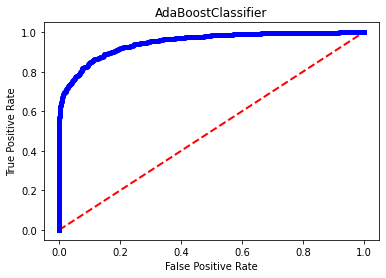

In [260]:
plt.plot([0, 1], [0, 1], 'k--', color = 'red', lw = 2)
plt.plot( fpr, tpr, color = 'b', lw = 5, label = 'ROC Curve')   # graph for AOC ROC curve
plt.xlabel('False Positive Rate')  # x axis
plt.ylabel('True Positive Rate')   # y axis
plt.title('AdaBoostClassifier')  # Title
plt.show()

In [261]:
# As our model is giving accuracy of 87 % , therefore, curve is not sharp

In [263]:
auc_score = roc_auc_score(y_test, final_model.predict(x_test))
auc_score

# 0.873949614860519

0.873949614860519

### Deploy Model

In [264]:
import pickle
filename = 'churn_predictor.pkl'                 # model name 
pickle.dump(final_model, open(filename, 'wb'))         # operation to deploy model

### Loading model

In [266]:
load_model =  pickle.load(open('churn_predictor.pkl', 'rb'))    # loading deployed model
result = load_model.score(x_test, y_test)                            
print(result) 

# 0.8741123305358296

0.8741123305358296


### Conclusion

In [267]:
original = np.array(y_test)
predicted = np.array(load_model.predict(x_test))  
# convert columns in to np.array 

In [269]:
# print(predicted.shape)
# print(original.shape)
# print(x_test.shape)
# print(y_test.shape)

In [270]:
conclusion = pd.DataFrame({'Actual Churn': original, 'Predicted Churn': predicted}, index = range(len(original)))
# Dataframe creation

In [271]:
pd.set_option('display.max_rows', None)  # To maximize the rows
conclusion.head()

,Actual Churn,Predicted Churn
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


In [272]:
conclusion.sample(10)

,Actual Churn,Predicted Churn
2601,1,1
2614,1,1
408,0,0
1283,1,1
118,0,0
1057,0,0
1507,0,0
5,1,1
248,0,0
128,1,1
